# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# saved a local copy of the dataset to further inspect
df_titanic.to_csv('/content/drive/My Drive/titanic1.csv', index=False)

In [ ]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
# find possible values for the 'class' variable
df_titanic["class"].unique()
# find possible values for the 'embarked' variable: C = Cherbourg, Q = Queenstown, S = Southampton
df_titanic["embarked"].unique()

array(['S', 'C', 'B', 'Q'], dtype=object)

In [ ]:
# check missing or NA values
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2207 non-null   object 
 1   gender    2207 non-null   object 
 2   age       2205 non-null   float64
 3   class     2207 non-null   object 
 4   embarked  2207 non-null   object 
 5   country   2126 non-null   object 
 6   ticketno  1316 non-null   float64
 7   fare      1291 non-null   float64
 8   survived  2207 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 155.3+ KB


A couple of ways to figure out who passengers are from this list. Looking at missing values for fare from 1st 2nd and 3rd class passengers excludes this variable. Thought process was that crew members are not charged a fare, and only passengers were, but there are missing values. Another way is to filter for only lst,2nd,3rd class passenger and exclude crew members.

In [ ]:
# filter data to include passengers only
df_titanic_passengers = df_titanic[df_titanic['class'].isin(['1st', '2nd', '3rd'])]
df_titanic_passengers.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [ ]:
df_titanic_passengers.describe()

,age,ticketno,fare,survived
count,1315.000000,1.316000e+03,1291.000000,1317.000000
mean,29.613688,2.842157e+05,33.404760,0.379651
std,13.862606,6.334726e+05,52.227592,0.485484
min,0.166667,2.000000e+00,3.030500,0.000000
25%,21.000000,1.426225e+04,7.180600,0.000000
50%,28.000000,1.114265e+05,14.090200,0.000000
75%,38.000000,3.470770e+05,31.060750,1.000000
max,74.000000,3.101317e+06,512.060700,1.000000


In [ ]:
# Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.
cross_tab = pd.crosstab(df_titanic_passengers["class"], df_titanic_passengers["embarked"], margins=True, margins_name="Total")
cross_tab

embarked,B,C,Q,S,Total
class,,,,,
1st,3,143,3,175,324
2nd,6,26,7,245,284
3rd,0,102,113,494,709
Total,9,271,123,914,1317


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Conditional Distribution of Class Given Where They Embarked
cond_dist_class_given_embarked = cross_tab.divide(cross_tab.sum(axis=0), axis=1)
print("Conditional Distribution of Class Given Where They Embarked:")
print(cond_dist_class_given_embarked)
print("\n")

Conditional Distribution of Class Given Where They Embarked:
embarked         B         C         Q         S     Total
class                                                     
1st       0.166667  0.263838  0.012195  0.095733  0.123007
2nd       0.333333  0.047970  0.028455  0.134026  0.107821
3rd       0.000000  0.188192  0.459350  0.270241  0.269172
Total     0.500000  0.500000  0.500000  0.500000  0.500000




In [ ]:
# Conditional Distribution of Where They Embarked Given Their Class
cond_dist_embarked_given_class = cross_tab.divide(cross_tab.sum(axis=1), axis=0)
print("Conditional Distribution of Where They Embarked Given Their Class:")
print(cond_dist_embarked_given_class)

Conditional Distribution of Where They Embarked Given Their Class:
embarked         B         C         Q         S  Total
class                                                  
1st       0.004630  0.220679  0.004630  0.270062    0.5
2nd       0.010563  0.045775  0.012324  0.431338    0.5
3rd       0.000000  0.071932  0.079690  0.348378    0.5
Total     0.003417  0.102885  0.046697  0.347001    0.5


In [ ]:
# Proportion of 3rd class passengers that embarked at Southampton
prop_3rd_class_Southampton = cond_dist_embarked_given_class.loc['3rd', 'S']
print(f"Proportion of 3rd class passengers that embarked at Southampton: {prop_3rd_class_Southampton:.2f}")

Proportion of 3rd class passengers that embarked at Southampton: 0.35


In [ ]:
# Proportion of Southampton passengers that were in 3rd class
prop_Southampton_3rd_class = cond_dist_class_given_embarked.loc['3rd', 'S']
print(f"Proportion of Southampton passengers that were in 3rd class: {prop_Southampton_3rd_class:.2f}")

Proportion of Southampton passengers that were in 3rd class: 0.54


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

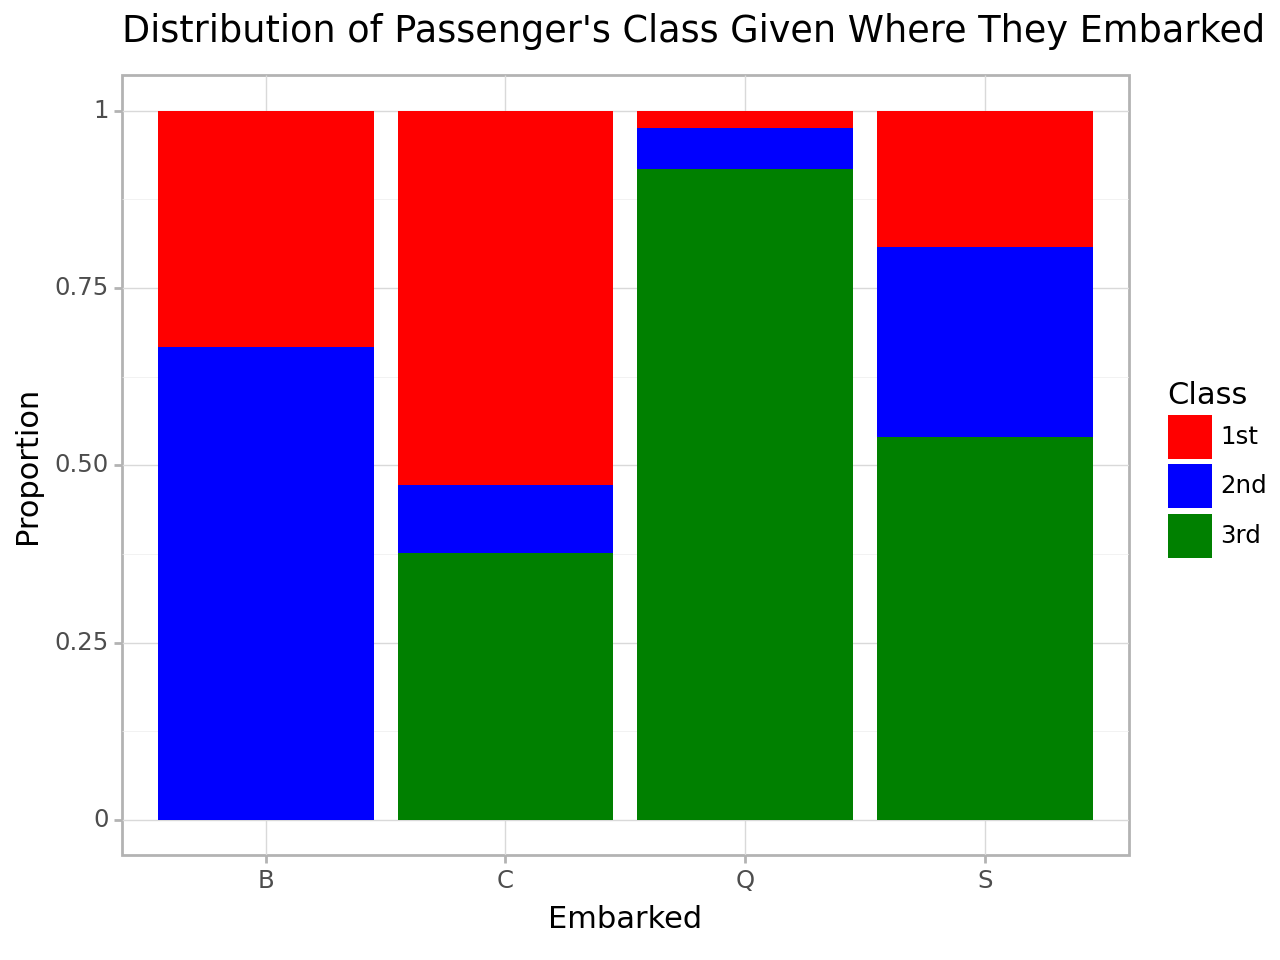

In [ ]:
import pandas as pd
import plotnine as p9

# Assuming you've already loaded the dataset into df_titanic

# Create a cross-tabulation
cross_tab = pd.crosstab(df_titanic_passengers['class'], df_titanic_passengers['embarked'])

# Conditional Distribution of Class Given Where They Embarked
cond_dist_class_given_embarked = cross_tab.divide(cross_tab.sum(axis=0), axis=1)

# Melt the dataframe to long format for plotting
df_melted = cond_dist_class_given_embarked.reset_index().melt(id_vars='class', value_name='proportion')

# Create a bar plot
plot = (p9.ggplot(df_melted, p9.aes(x='embarked', y='proportion', fill='class'))
        + p9.geom_bar(stat='identity', position='stack')
        + p9.theme_light()
        + p9.labs(title="Distribution of Passenger's Class Given Where They Embarked",
                  x="Embarked",
                  y="Proportion")
        + p9.scale_fill_manual(values=['red', 'blue', 'green'], name="Class")
       )

plot.draw()
